# Cellchat fetch resuls

In [1]:
options(warn=-1, stringsAsFactors=FALSE)

In [2]:
library_load <- suppressMessages(
    
    list(
        
        # CellTalk
        library(CellChat), 
        
        # Seurat 
        library(Seurat), 
        
        # Data 
        library(tidyverse), 
        
        # Plotting 
        library(ComplexHeatmap), 
        library(circlize), 
        library(viridis), 
        library(ggplotify), 
        library(ggrepel), 
        library(cowplot)
        
    )
)

In [3]:
random_seed <- 42
set.seed(random_seed)

In [4]:
ht_opt$message=FALSE # ComplexHeatmap 

In [5]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [6]:
# Source files
source("plotting_global.R")
source("bin/cci_pp.R")
source("bin/cci_pl.R")

In [7]:
# Plotting Theme
ggplot2::theme_set(theme_global_set(1)) # From project global source()

# Parameter and files 

In [8]:
so_file <- "data/scRNAseq/object/pp.rds"

# Import 

In [9]:
so <- readRDS(so_file)
so <- NormalizeData(so)

Normalizing layer: counts



# CellChat results

In [10]:
lr_res <- read.csv("result/cci/lr_res.csv", row.names=1)

# Parameter 

In [11]:
pval_prob_thr <- 0.05
p_val_adj_dea <- 0.05

# CellChat results

In [12]:
lr_res <- read.csv("result/cci/lr_res.csv", row.names=1)

## Add reversed Cell-cell interactions 

In [13]:
# Load full data base 
db <- CellChat::CellChatDB.mouse

In [14]:
# Impute custom interactions
options(stringsAsFactors=FALSE)
interaction <- read.csv("data/reference/cellchat/interaction.csv", row.names=1, na.strings=c(""))
interaction[is.na(interaction)] <- ""
db$interaction <- rbind(db$interaction, interaction)

In [15]:
# Get cell-cell contact interaction 
db <- CellChat::subsetDB(db, search=c("Cell-Cell Contact"), key="annotation")

In [16]:
# Subset lr results for cell-cell contact forward 
lr_res_ccc_fwd <- lr_res %>% dplyr::filter(lr_res$interaction_name %in% db$interaction$interaction_name)

In [17]:
# Reverse cell-cell contact 
lr_res_ccc_rev <- data.frame(

    source=lr_res_ccc_fwd$target, 
    target=lr_res_ccc_fwd$source, 
    interaction_name=paste0(lr_res_ccc_fwd$receptor_symbol, "_", lr_res_ccc_fwd$ligand_symbol), 
    prob=lr_res_ccc_fwd$prob, 
    pval=lr_res_ccc_fwd$pval, 
    pathway_name=lr_res_ccc_fwd$pathway_name, 
    ligand_symbol=lr_res_ccc_fwd$receptor_symbol, 
    receptor_symbol=lr_res_ccc_fwd$ligand_symbol, 
    sample_group=lr_res_ccc_fwd$sample_group
    
)

In [18]:
# Combine results 
lr_res_ccc <- rbind(lr_res_ccc_fwd, lr_res_ccc_rev)

In [19]:
# Assemble LR results 
lr_res <- rbind(lr_res[!lr_res$interaction_name %in% lr_res_ccc$interaction_name, ], lr_res_ccc)

# DEA results 

In [20]:
dea_res_1 <- readRDS("result/dea/scRNAseq/wilcox/IFNAR_fl_Baseline_D0_vs_IFNAR_fl_LysM_cre_Baseline_D0.rds")[c("cMo", "intMo", "RPM", "cDC2", "Basophil", "MEP", "Proerythroblast", "Erythroblast")]
dea_res_1 <- lapply(dea_res_1, function(x) {list("Ctr"=x)})

In [21]:
dea_res_2 <- readRDS("result/dea/scRNAseq/wilcox/IFNAR_fl_CpG_D1_vs_IFNAR_fl_LysM_cre_CpG_D1.rds")[c("cMo", "intMo", "RPM", "cDC2", "Basophil", "MEP", "Proerythroblast", "Erythroblast")]
dea_res_2 <- lapply(dea_res_2, function(x) {list("D1"=x)})

In [22]:
dea_res_3 <- readRDS("result/dea/scRNAseq/wilcox/IFNAR_fl_CpG_D3_vs_IFNAR_fl_LysM_cre_CpG_D3.rds")[c("cMo", "intMo", "RPM", "cDC2", "Basophil", "MEP", "Proerythroblast", "Erythroblast")]
dea_res_3 <- lapply(dea_res_3, function(x) {list("D3"=x)})

In [23]:
dea_res <- Map(c, dea_res_1, dea_res_2, dea_res_3)

# Ctl and D1 and D3 for (+/+) vs (cre/+)

## cMo

In [69]:
source <- c("cMo")
target <- c("MEP")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [70]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

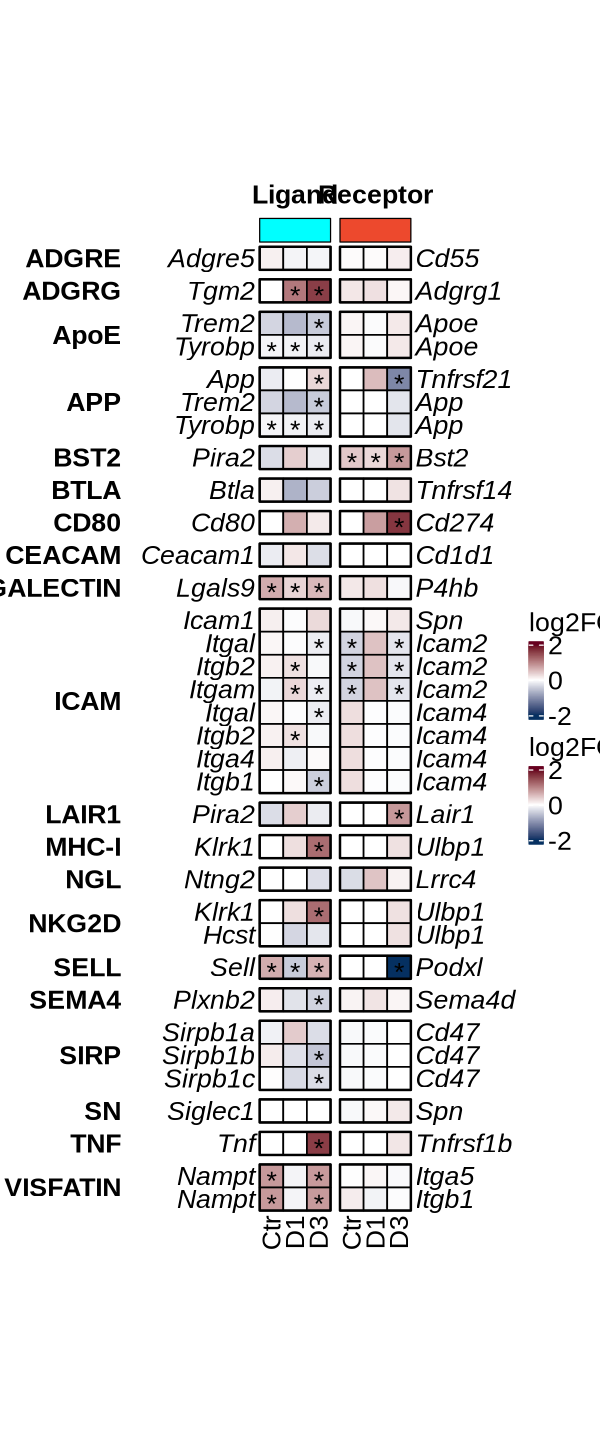

In [74]:
options(repr.plot.width=5, repr.plot.height=12)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [75]:
source <- c("cMo")
target <- c("Proerythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [76]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

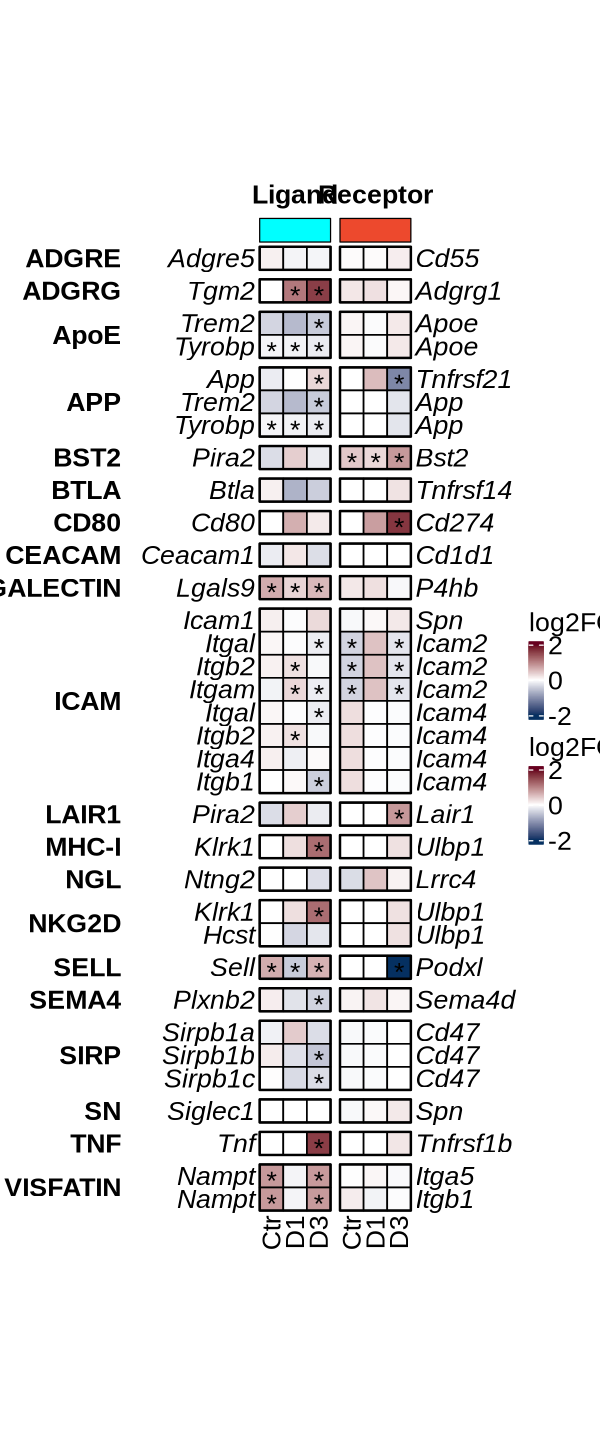

In [78]:
options(repr.plot.width=5, repr.plot.height=12)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [79]:
source <- c("cMo")
target <- c("Erythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [80]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

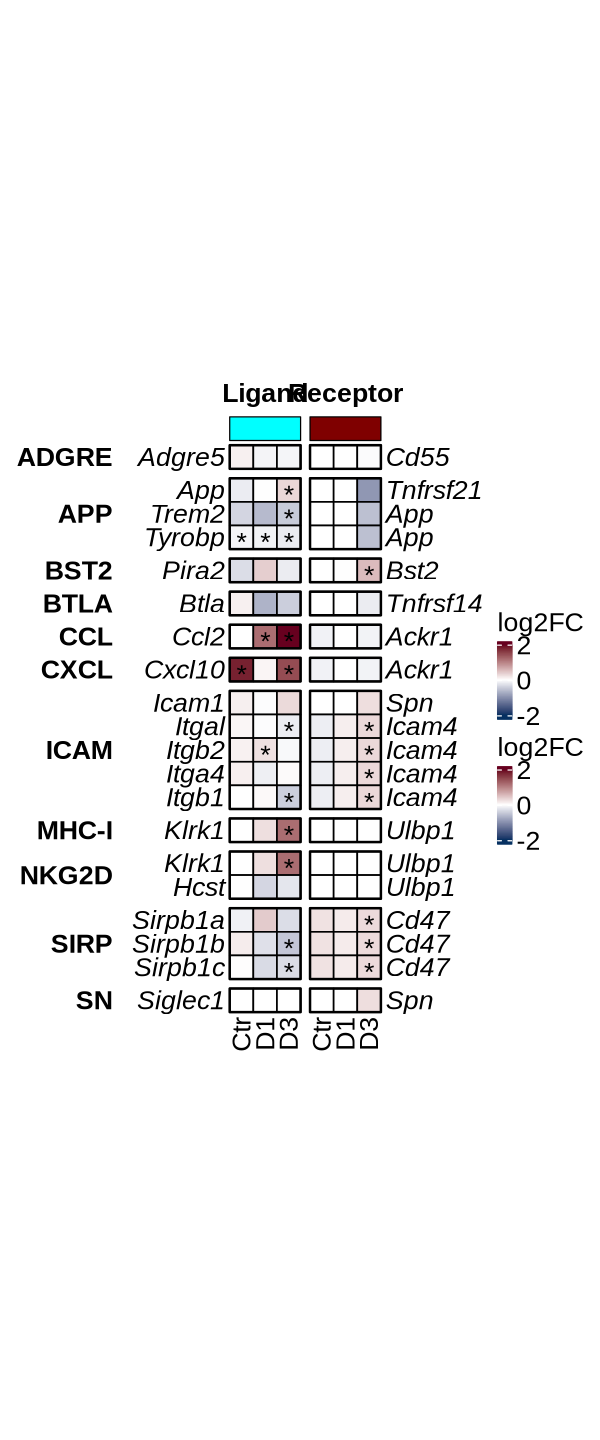

In [82]:
options(repr.plot.width=5, repr.plot.height=12)

dea_lr_hm(lr_res_i, dea_res, source, target)

## intMo

In [83]:
source <- c("intMo")
target <- c("MEP")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [84]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

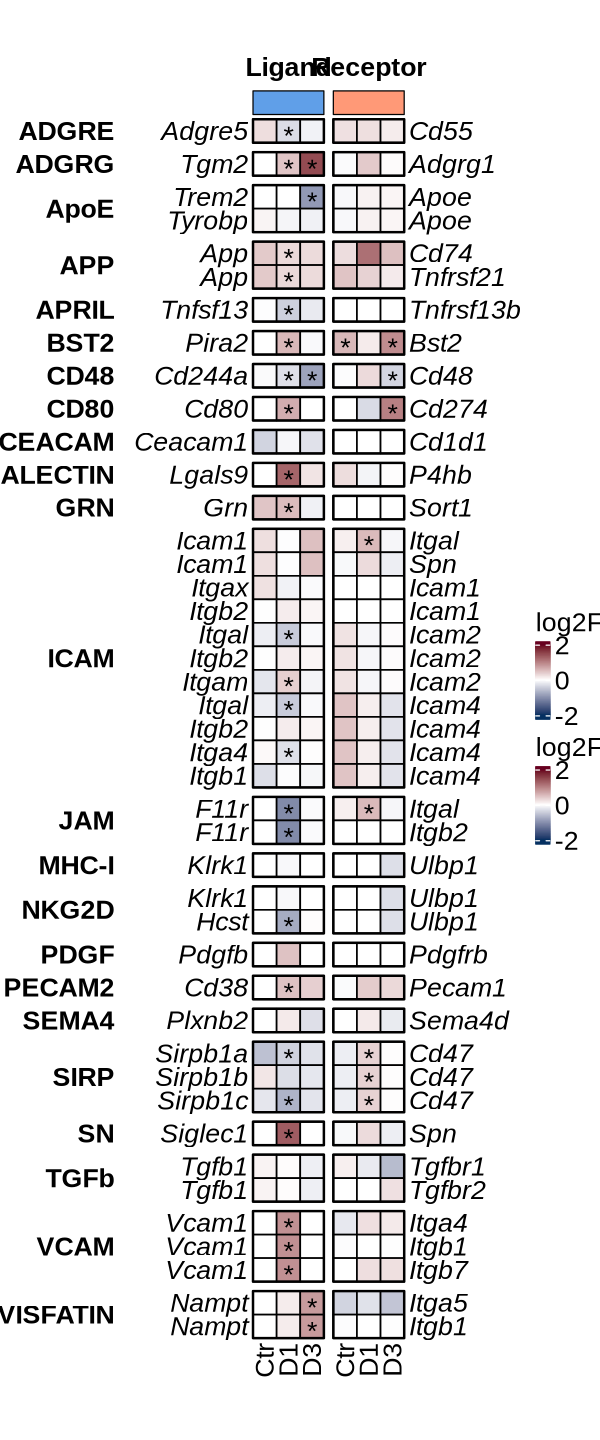

In [86]:
options(repr.plot.width=5, repr.plot.height=12)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [87]:
source <- c("intMo")
target <- c("Proerythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [88]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

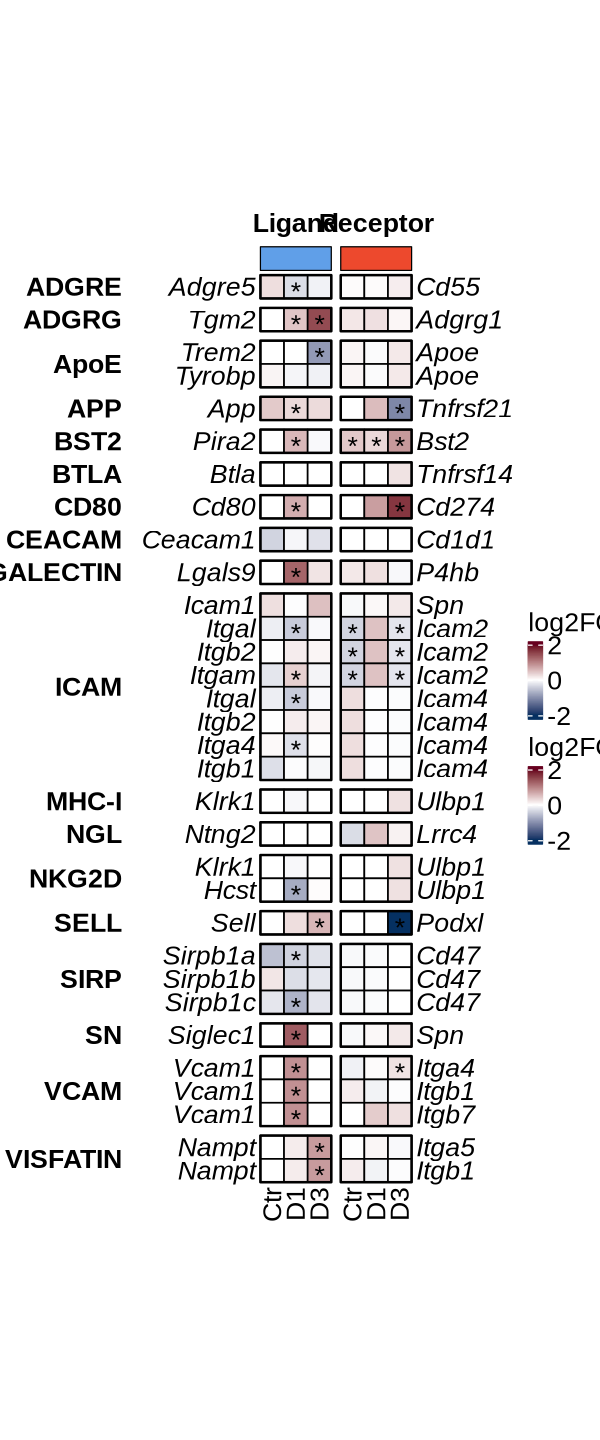

In [90]:
options(repr.plot.width=5, repr.plot.height=12)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [91]:
source <- c("intMo")
target <- c("Erythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [92]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

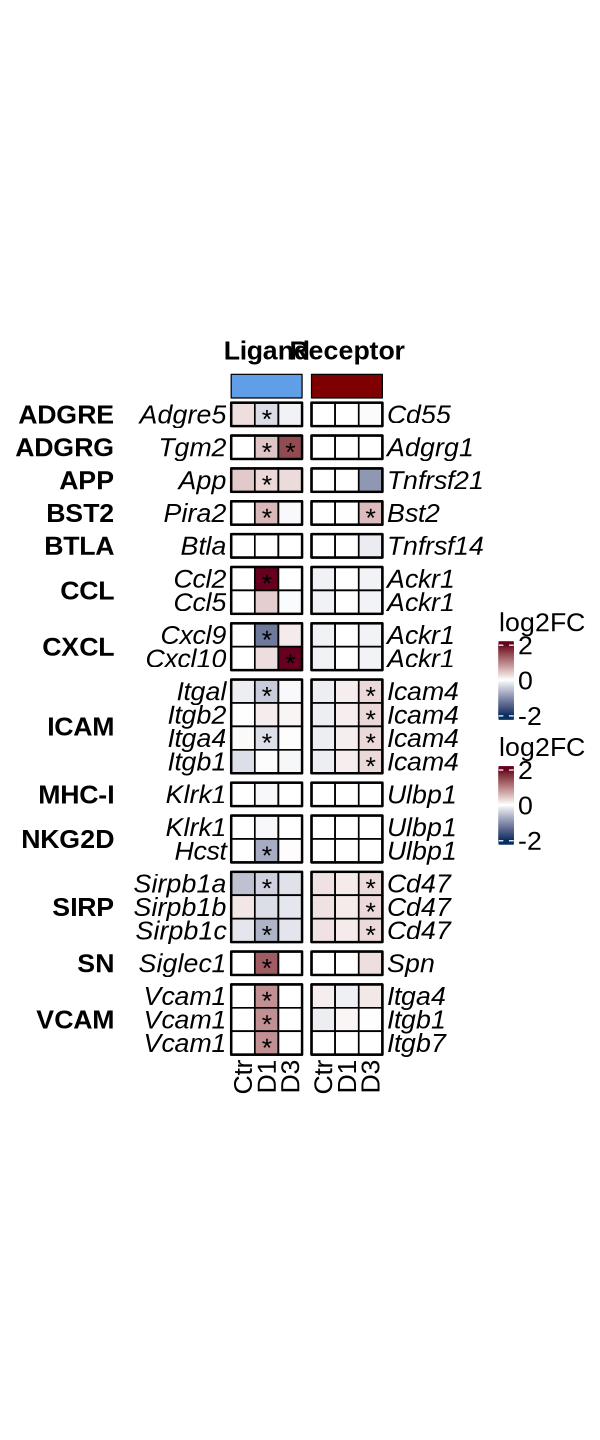

In [93]:
options(repr.plot.width=5, repr.plot.height=12)

dea_lr_hm(lr_res_i, dea_res, source, target)

## RPM

In [94]:
source <- c("RPM")
target <- c("MEP")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [95]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

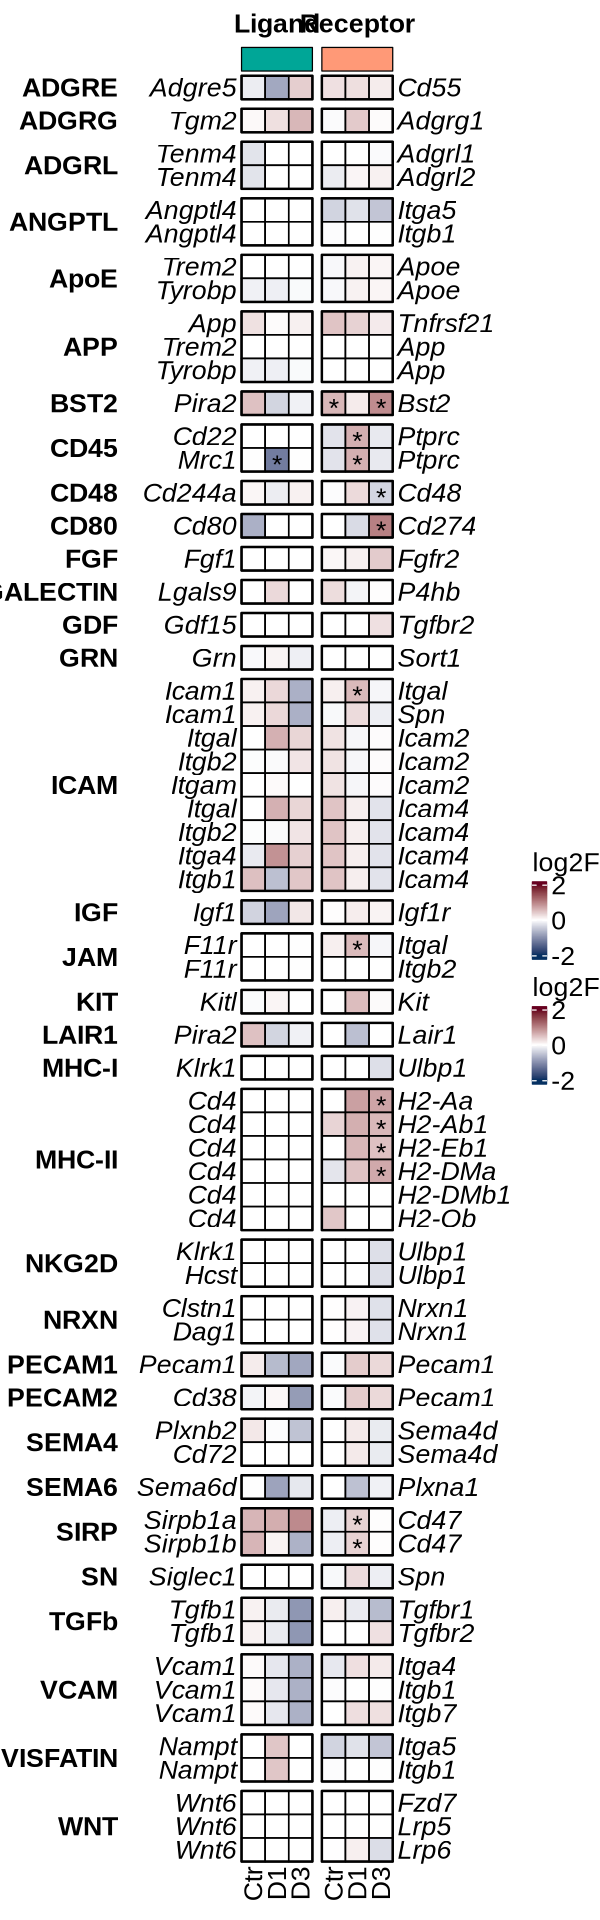

In [98]:
options(repr.plot.width=5, repr.plot.height=16)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [99]:
source <- c("RPM")
target <- c("Proerythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [100]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

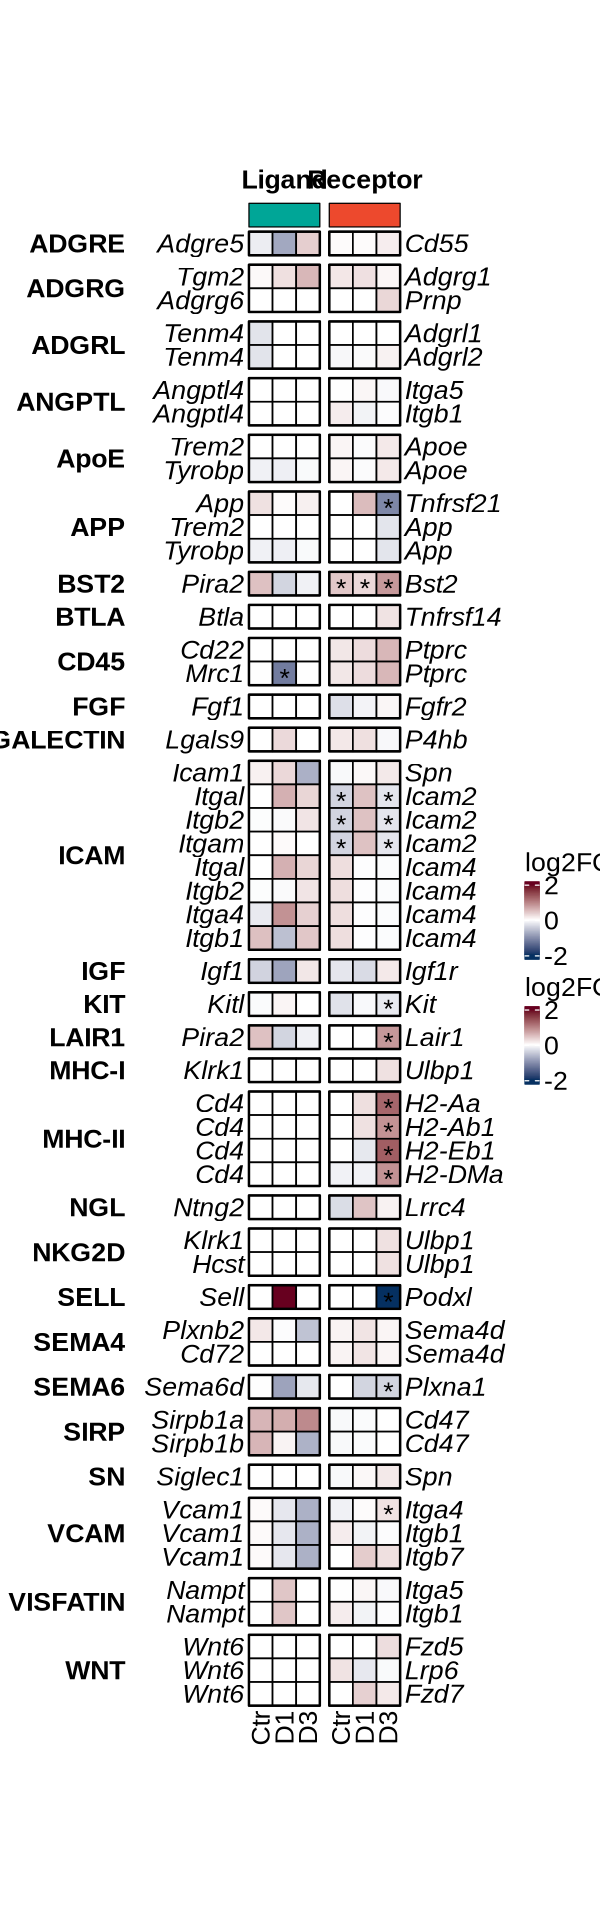

In [101]:
options(repr.plot.width=5, repr.plot.height=16)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [102]:
source <- c("RPM")
target <- c("Erythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [103]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

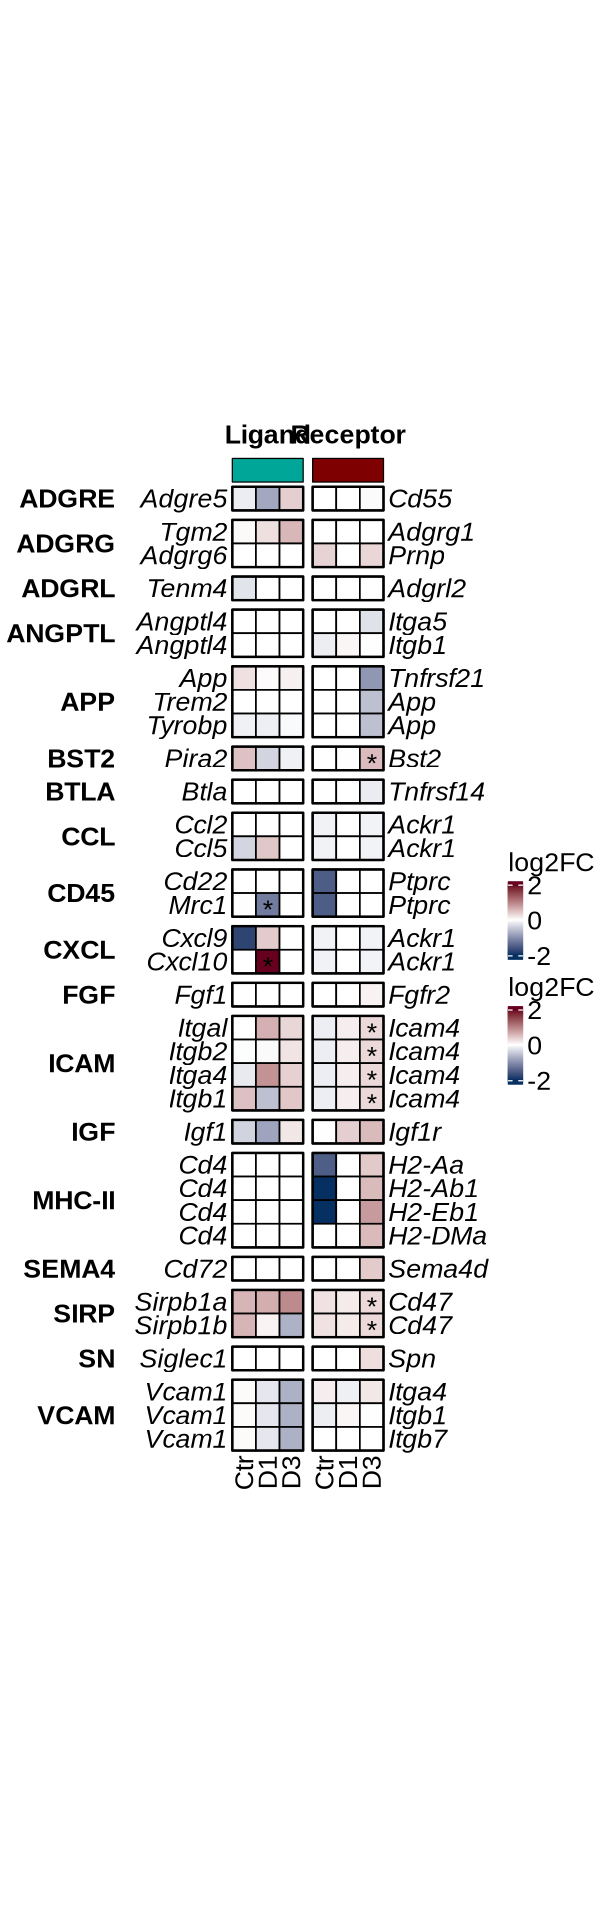

In [104]:
options(repr.plot.width=5, repr.plot.height=16)

dea_lr_hm(lr_res_i, dea_res, source, target)

## cDC2

In [105]:
source <- c("cDC2")
target <- c("MEP")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [106]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

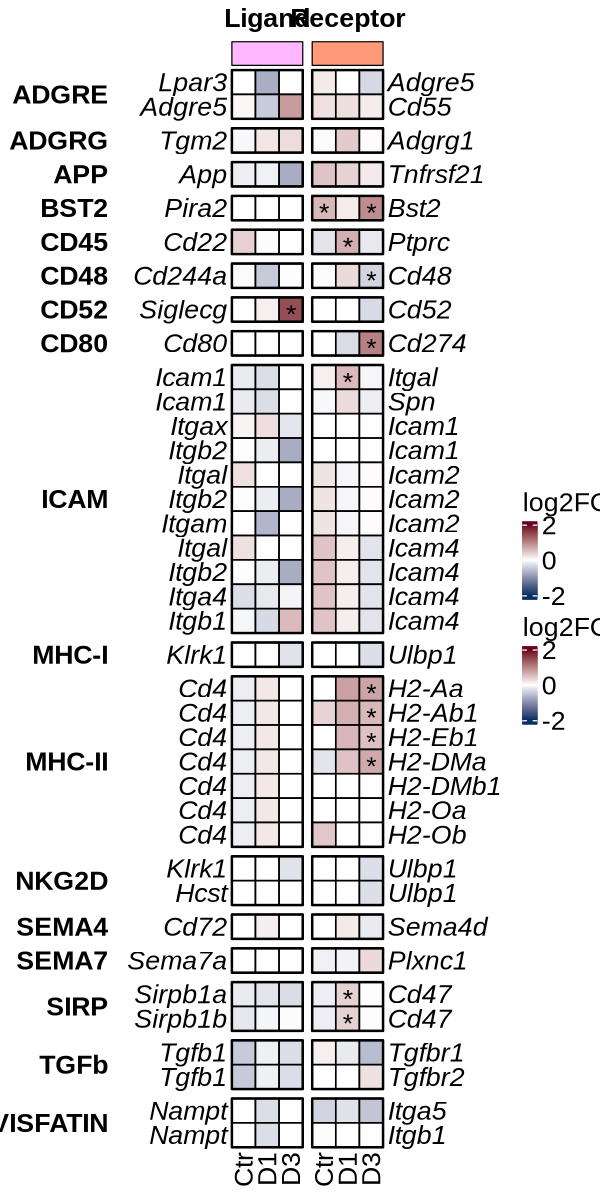

In [107]:
options(repr.plot.width=5, repr.plot.height=10)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [108]:
source <- c("cDC2")
target <- c("Proerythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [109]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

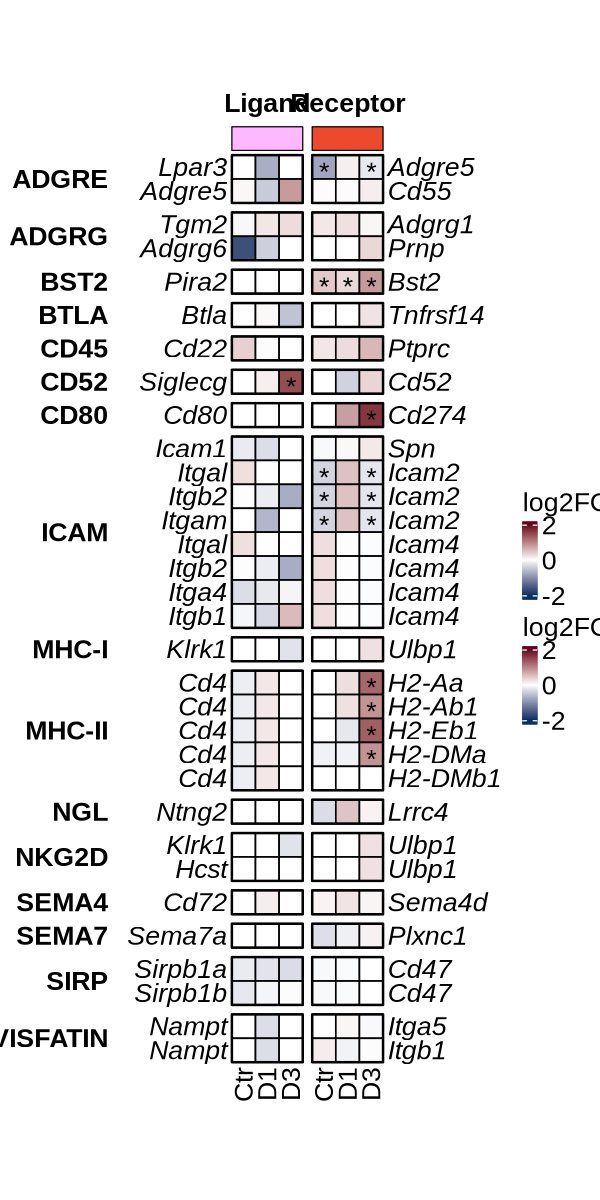

In [110]:
options(repr.plot.width=5, repr.plot.height=10)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [111]:
source <- c("cDC2")
target <- c("Erythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [112]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

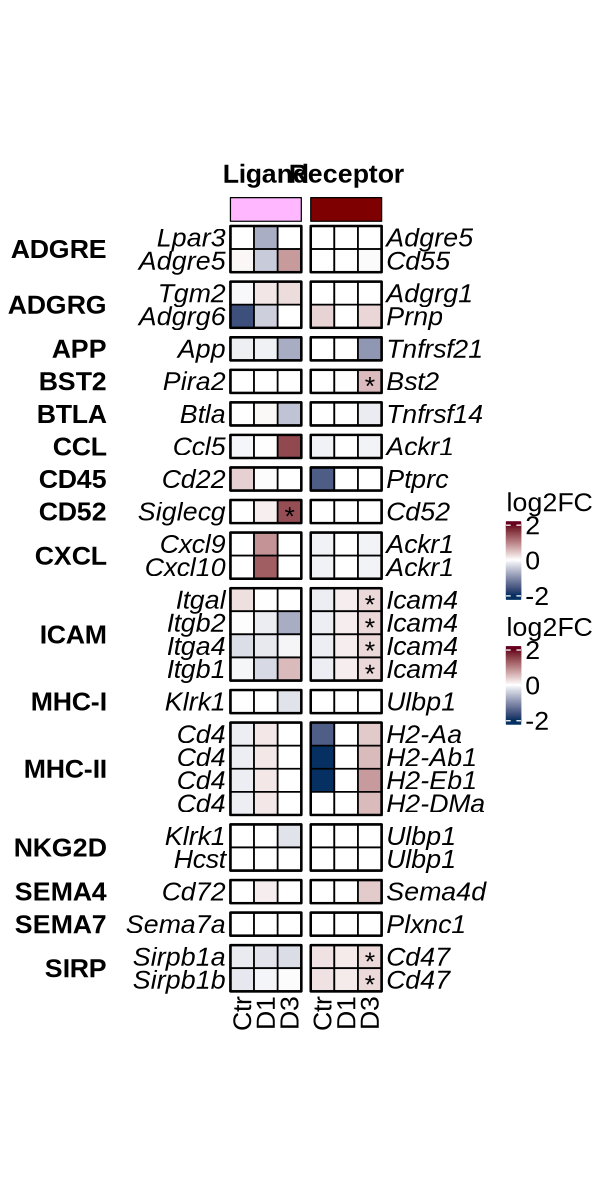

In [113]:
options(repr.plot.width=5, repr.plot.height=10)

dea_lr_hm(lr_res_i, dea_res, source, target)

## Basophil

In [114]:
source <- c("Basophil")
target <- c("MEP")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [115]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

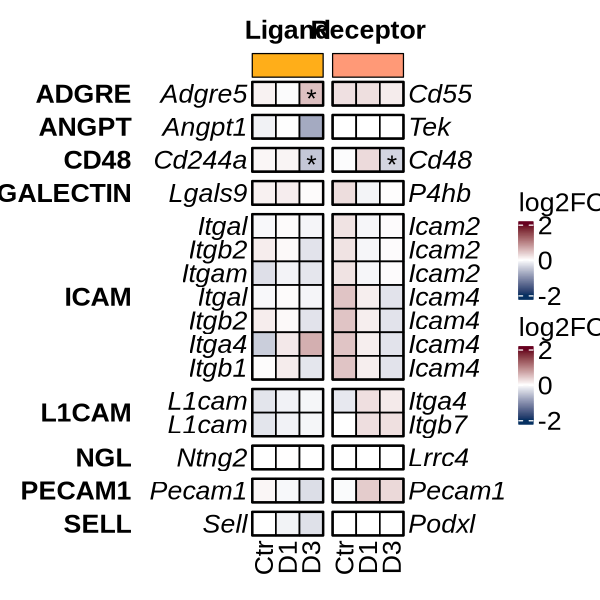

In [116]:
options(repr.plot.width=5, repr.plot.height=5)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [117]:
source <- c("Basophil")
target <- c("Proerythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [118]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

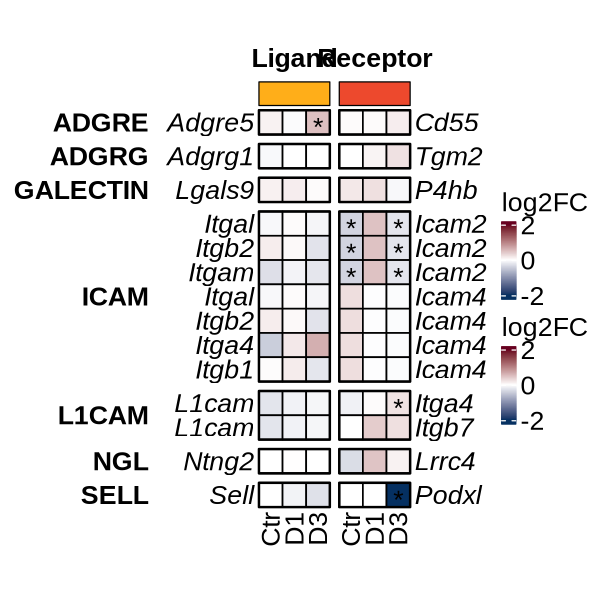

In [119]:
options(repr.plot.width=5, repr.plot.height=5)

dea_lr_hm(lr_res_i, dea_res, source, target)

In [120]:
source <- c("Basophil")
target <- c("Erythroblast")
sample_group <- c("Ctr:+/+"="IFNAR_fl_Baseline_D0", "D1:+/+"="IFNAR_fl_CpG_D1", "D3:+/+"="IFNAR_fl_CpG_D3", "Ctr:+/+"="IFNAR_fl_LysM_cre_Baseline_D0", "D1:+/+"="IFNAR_fl_LysM_cre_CpG_D1", "D3:+/+"="IFNAR_fl_LysM_cre_CpG_D3")

In [121]:
lr_res_i <- lr_res_parse(lr_res, source, target, sample_group, pval_prob_thr)
lr_res_i <- lr_res_stretch(lr_res_i)

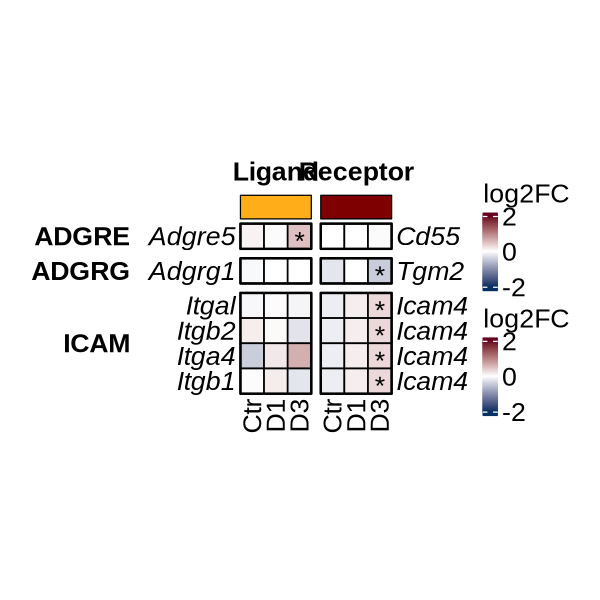

In [122]:
options(repr.plot.width=5, repr.plot.height=5)

dea_lr_hm(lr_res_i, dea_res, source, target)